<a href="https://colab.research.google.com/github/aryan-at-ul/customer_segmentation/blob/main/GMM_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
data_path = "/content/drive/MyDrive/customer_segmentation/segmentation data.csv"

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import os 
import pandas as pd
import scipy 
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.cluster import Birch
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture

# from sklearn import metrics
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score

import pickle
#sns skin on matplotlib
sns.set()

In [ ]:
df_segmentation = pd.read_csv(data_path,index_col = 0)
df_segmentation.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [ ]:
df_segmentation.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [ ]:
df_segmentation.corr() 

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


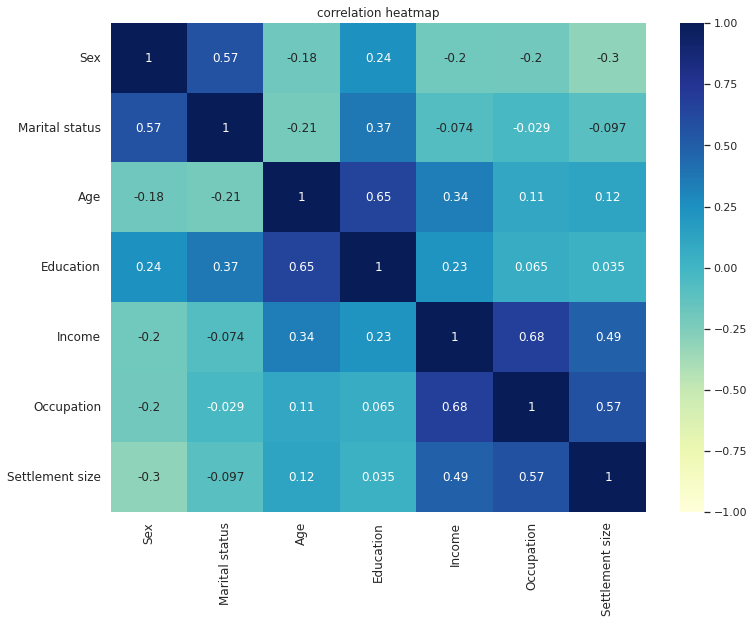

In [ ]:
plt.figure(figsize= (12,9))
s = sns.heatmap(df_segmentation.corr(),
                annot = True,
                cmap = 'YlGnBu',#autum, viridis , RdBu, YlGnBu
                vmin = -1,
                vmax = 1) 

s.set_yticklabels(s.get_yticklabels(),rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)

plt.title("correlation heatmap")
plt.show()

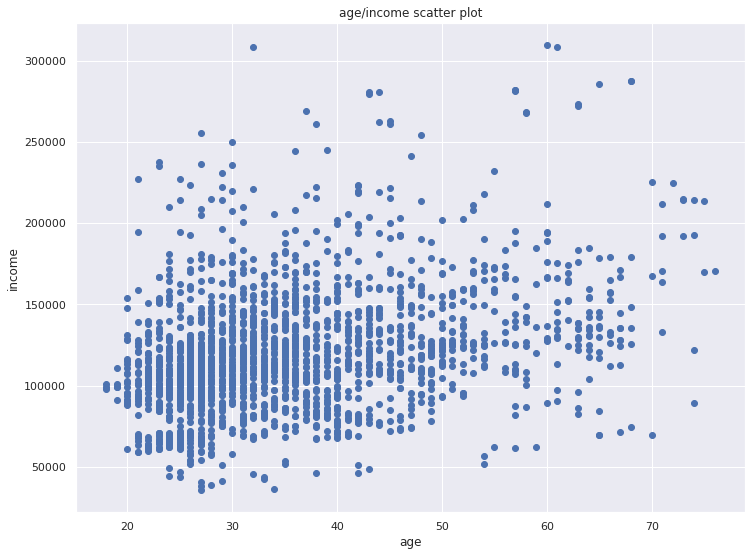

In [ ]:
plt.figure(figsize= (12,9))
plt.scatter(df_segmentation.iloc[:,2],df_segmentation.iloc[:,4])
plt.xlabel('age')
plt.ylabel('income')
plt.title('age/income scatter plot')
plt.show()

In [ ]:
scalar = StandardScaler()
segmentation_std = scalar.fit_transform(df_segmentation)

segmentation_std

array([[-0.91739884, -0.99302433,  2.65361447, ...,  0.09752361,
         0.29682303,  1.552326  ],
       [ 1.09003844,  1.00702467, -1.18713209, ...,  0.78265438,
         0.29682303,  1.552326  ],
       [-0.91739884, -0.99302433,  1.11731585, ..., -0.83320224,
        -1.26952539, -0.90972951],
       ...,
       [-0.91739884, -0.99302433, -0.41898277, ..., -0.90695688,
        -1.26952539, -0.90972951],
       [ 1.09003844,  1.00702467, -1.01643224, ..., -0.60332923,
        -1.26952539, -0.90972951],
       [-0.91739884, -0.99302433, -0.93108232, ..., -1.3789866 ,
        -1.26952539, -0.90972951]])

In [ ]:
model = GaussianMixture(n_components=4)
model.fit(segmentation_std)

GaussianMixture(n_components=4)

In [ ]:
df_segmentation_gmm = df_segmentation.copy()
df_segmentation_gmm['Segment GMM'] = model.predict(segmentation_std)

In [ ]:
df_segmentation_analysis = df_segmentation_gmm.groupby(['Segment GMM']).mean()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment GMM,,,,,,,
0,0.000000,0.103679,40.941472,0.961538,145521.908027,1.202341,1.469900
1,0.360262,0.000000,36.659389,0.792576,99031.657205,0.366812,0.000000
2,1.000000,0.927374,50.368715,2.083799,139005.703911,0.854749,0.798883
3,0.745098,1.000000,28.142484,1.000000,110651.264052,0.759477,0.596078


In [ ]:
df_segmentation_analysis['N observation'] = df_segmentation_gmm[['Segment GMM','Sex']].groupby(['Segment GMM']).count()
df_segmentation_analysis['proportation observation'] = df_segmentation_analysis['N observation'] / df_segmentation_analysis['N observation'].sum()
df_segmentation_analysis

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N observation,proportation observation
Segment GMM,,,,,,,,,
0,0.000000,0.103679,40.941472,0.961538,145521.908027,1.202341,1.469900,598,0.2990
1,0.360262,0.000000,36.659389,0.792576,99031.657205,0.366812,0.000000,458,0.2290
2,1.000000,0.927374,50.368715,2.083799,139005.703911,0.854749,0.798883,179,0.0895
3,0.745098,1.000000,28.142484,1.000000,110651.264052,0.759477,0.596078,765,0.3825


In [ ]:
df_segmentation_analysis.rename({
    0:'well-off',
    1:'fewer-opportunities',
    2:'highly educated',
    3:'standard'

})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,N observation,proportation observation
Segment GMM,,,,,,,,,
well-off,0.000000,0.103679,40.941472,0.961538,145521.908027,1.202341,1.469900,598,0.2990
fewer-opportunities,0.360262,0.000000,36.659389,0.792576,99031.657205,0.366812,0.000000,458,0.2290
highly educated,1.000000,0.927374,50.368715,2.083799,139005.703911,0.854749,0.798883,179,0.0895
standard,0.745098,1.000000,28.142484,1.000000,110651.264052,0.759477,0.596078,765,0.3825


In [ ]:
df_segmentation_gmm['Labels'] = df_segmentation_gmm['Segment GMM'].map({
    0:'well-off',
    1:'fewer-opportunities',
    2:'highly educated',
    3:'standard'
})
df_segmentation_gmm

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment GMM,Labels
ID,,,,,,,,,
100000001,0,0,67,2,124670,1,2,0,well-off
100000002,1,1,22,1,150773,1,2,3,standard
100000003,0,0,49,1,89210,0,0,1,fewer-opportunities
100000004,0,0,45,1,171565,1,1,0,well-off
100000005,0,0,53,1,149031,1,1,0,well-off
...,...,...,...,...,...,...,...,...,...
100001996,1,0,47,1,123525,0,0,1,fewer-opportunities
100001997,1,1,27,1,117744,1,0,3,standard
100001998,0,0,31,0,86400,0,0,1,fewer-opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Segmentation using GMM')

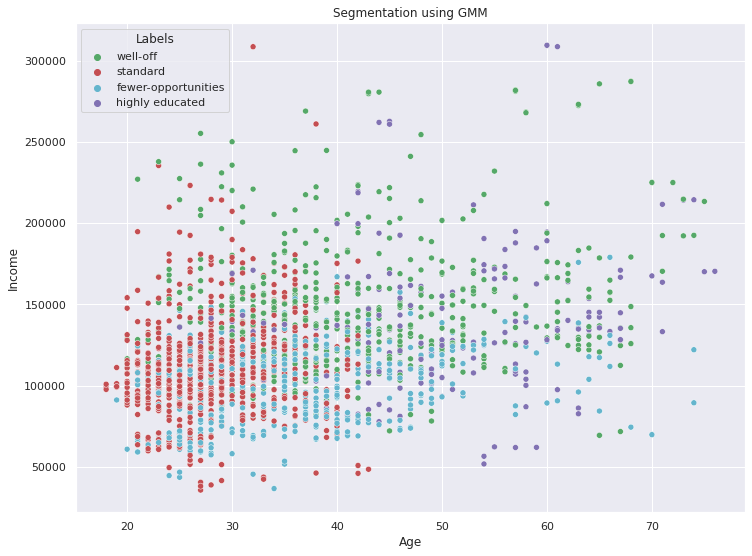

In [ ]:
x_axis = df_segmentation_gmm['Age']
y_axis = df_segmentation_gmm['Income']

plt.figure(figsize = (12,9))
sns.scatterplot(x_axis,y_axis, hue = df_segmentation_gmm['Labels'], palette = ['g','r','c','m'])
plt.title('Segmentation using GMM')

In [ ]:
pca = PCA()
pca.fit(segmentation_std)

pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

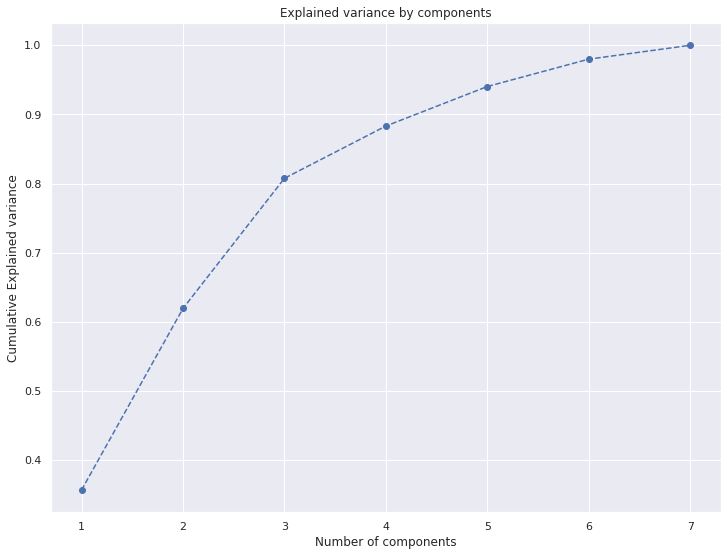

In [ ]:
plt.figure(figsize = (12,9))
plt.plot(range(1,8),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained variance by components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative Explained variance')
plt.show()

In [ ]:
pca = PCA(n_components= 3)
pca.fit(segmentation_std)

PCA(n_components=3)

In [ ]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df_segmentation.columns.values,
                           index = ['Component 1','Component 2','Component 3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Component 1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Component 2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Component 3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


([<matplotlib.axis.YTick at 0x7f8ae08865d0>,
 [Text(0, 0.5, 'Component 1'),
  Text(0, 1.5, 'Component 2'),
  Text(0, 2.5, 'Component 3')])

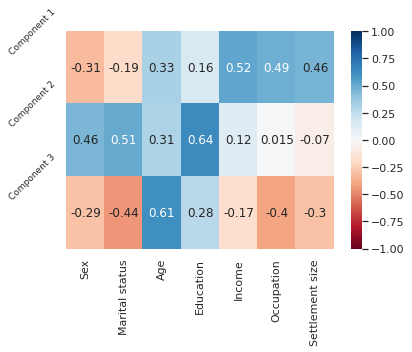

In [ ]:
sns.heatmap(df_pca_comp,
            vmin = -1,
            vmax = 1, 
            annot = True,
            cmap = 'RdBu')
plt.yticks([0,1,2],
           ['Component 1','Component 2','Component 3'],
           rotation = 45,
           fontsize = 9)


In [ ]:
#!pip install --upgrade sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model = GaussianMixture(n_components=4,covariance_type = 'tied', warm_start = True)
model.fit(score_pca)

GaussianMixture(covariance_type='tied', n_components=4, warm_start=True)

In [ ]:
score_pca = pca.transform(segmentation_std) #pca score
score_pca

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [ ]:
df_seg_pca_gmm = pd.concat([df_segmentation.reset_index(drop = True),pd.DataFrame(score_pca)],axis = 1)
df_seg_pca_gmm.columns.values[-3:] = ['Component 1','Component 2','Component 3']

df_seg_pca_gmm['Segment GMM PCA'] = model.predict(score_pca)
df_seg_pca_gmm

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment GMM PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2
...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,3
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0


In [ ]:
df_seg_pca_gmm_freq = df_seg_pca_gmm.groupby(['Segment GMM PCA']).mean()
df_seg_pca_gmm_freq #career, education lifestyle, experience

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3
Segment GMM PCA,,,,,,,,,,
0,0.770588,0.900000,28.362353,1.000000,109704.535294,0.737647,0.550588,-0.891629,0.438046,-0.788585
1,0.747967,0.926829,51.077236,2.146341,141127.012195,0.841463,0.813008,0.707195,2.355909,0.613157
2,0.069692,0.000000,44.212318,1.131280,131147.748784,0.915721,0.931929,1.022363,-0.525132,0.961828
3,0.111498,0.000000,27.407666,0.000000,115068.212544,0.773519,0.818815,-0.163357,-2.187757,-0.257797


In [ ]:
df_seg_pca_gmm_freq['N observations'] = df_seg_pca_gmm[['Segment GMM PCA','Sex']].groupby(['Segment GMM PCA']).count()
df_seg_pca_gmm_freq['Proportion of Observations'] = df_seg_pca_gmm_freq['N observations'] / df_seg_pca_gmm_freq['N observations'].sum()

df_seg_pca_gmm_freq = df_seg_pca_gmm_freq.rename({
    0:'fewer-opportunities',
    1:'well-off',
    2:'Career-focued',
    3:'standard'
})

df_seg_pca_gmm_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,N observations,Proportion of Observations
Segment GMM PCA,,,,,,,,,,,,
fewer-opportunities,0.770588,0.900000,28.362353,1.000000,109704.535294,0.737647,0.550588,-0.891629,0.438046,-0.788585,850,0.4250
well-off,0.747967,0.926829,51.077236,2.146341,141127.012195,0.841463,0.813008,0.707195,2.355909,0.613157,246,0.1230
Career-focued,0.069692,0.000000,44.212318,1.131280,131147.748784,0.915721,0.931929,1.022363,-0.525132,0.961828,617,0.3085
standard,0.111498,0.000000,27.407666,0.000000,115068.212544,0.773519,0.818815,-0.163357,-2.187757,-0.257797,287,0.1435


In [ ]:
df_seg_pca_gmm['Legend'] = df_seg_pca_gmm['Segment GMM PCA'].map({
    0:'fewer-opportunities',
    1:'well-off',
    2:'Career-focued',
    3:'standard'
})
df_seg_pca_gmm

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Component 1,Component 2,Component 3,Segment GMM PCA,Legend
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,2,Career-focued
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0,fewer-opportunities
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2,Career-focued
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,2,Career-focued
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,2,Career-focued
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,-0.866034,0.298330,1.438958,2,Career-focued
1996,1,1,27,1,117744,1,0,-1.114957,0.794727,-1.079871,0,fewer-opportunities
1997,0,0,31,0,86400,0,0,-1.452298,-2.235937,0.896571,3,standard
1998,1,1,24,1,97968,0,0,-2.241453,0.627108,-0.530456,0,fewer-opportunities


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


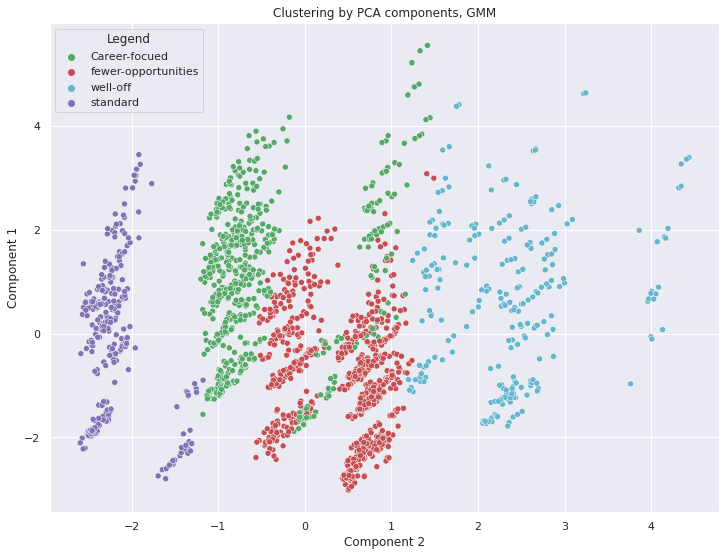

In [ ]:
#ploting  2 vs 1
x_axis = df_seg_pca_gmm['Component 2']
y_axis = df_seg_pca_gmm['Component 1']
plt.figure(figsize = (12,9))

sns.scatterplot(x_axis,y_axis, hue = df_seg_pca_gmm['Legend'], palette = ['g','r','c','m'])
plt.title('Clustering by PCA components, GMM')
plt.show()

In [ ]:
print(f'silhouette_score: {silhouette_score(score_pca, model.predict(score_pca))}')
print(f'calinski_harabasz_score: {calinski_harabasz_score(score_pca,model.predict(score_pca))}')
print(f'davies_bouldin_score: {davies_bouldin_score(score_pca,model.predict(score_pca))}')

silhouette_score: 0.33808601889333706
calinski_harabasz_score: 684.6229935064808
davies_bouldin_score: 1.1959696612336614
